<a href="https://colab.research.google.com/github/ZahraEk/Digital-Image-Proccesing/blob/main/DIP_EXC3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries 

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q3 :

Fourier transform :

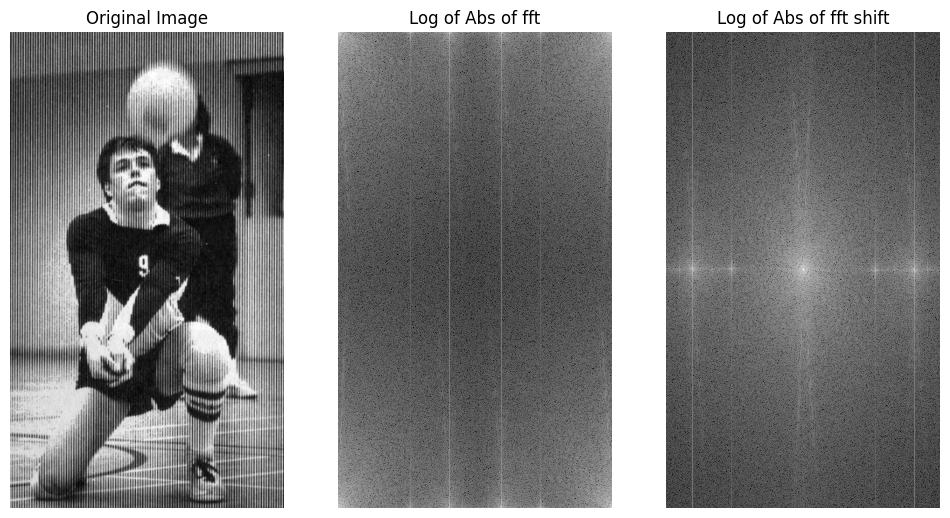

In [57]:
# Read image
img = cv2.imread("drive/MyDrive/DIP_EXC3/Q3/Q3_img.jpg",0)

# Compute the Fourier transform
fft = np.fft.fft2(img)
S_fft = np.log(1+np.abs(fft))

# Shift the Fourier transform
fft_shift = np.fft.fftshift(fft)
S_shift = np.log(1+np.abs(fft_shift))

# Show images
f, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(S_fft, cmap='gray')
ax[1].set_title("Log of Abs of fft")
ax[1].axis('off')
ax[2].imshow(S_shift ,cmap='gray')
ax[2].set_title("Log of Abs of fft shift")
ax[2].axis('off')

plt.show()

Remove noise :

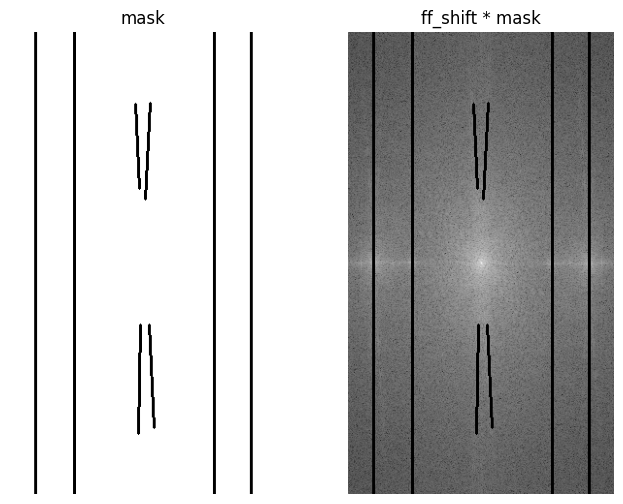

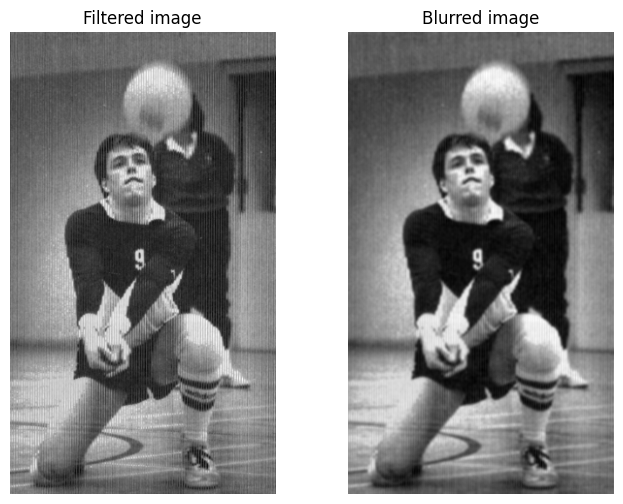

In [79]:
# Get the shape of the image
rows, cols = img.shape

# Create a mask with the same size as the image
mask = np.ones((rows, cols), dtype=np.uint8)

# Draw a lines on the mask
points = [
    [(26, 0), (26, 477)],
    [(248, 0), (248, 477)],
    [(66, 0), (66, 477)],
    [(210, 0), (210, 477)],
    [(144, 73), (139, 172)],
    [(129, 74), (133, 161)],
    [(143, 302), (148, 408)],
    [(134, 302), (132, 414)]
]

color = 0
thickness = 2

for start_point, end_point in points:
    cv2.line(mask, start_point, end_point, color, thickness)

# Apply the mask to the Fourier transform
fshift_filtered = fft_shift * mask
S_fshift_filtered = np.log(1+np.abs(fshift_filtered))

# Shift the filtered Fourier transform 
f_filtered = np.fft.ifftshift(fshift_filtered)

# Compute the inverse Fourier transform 
filtered_img = np.fft.ifft2(f_filtered)
filtered_img= np.abs(filtered_img)


# Define the size of the average mask (kernel)
kernel_size = (3, 3)

# Apply average mask blurring
blurred_img = cv2.blur(filtered_img, kernel_size)

#Show images
f, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(mask,cmap='gray')
ax[0].set_title("mask")
ax[0].axis('off')
ax[1].imshow(S_fshift_filtered,cmap='gray')
ax[1].set_title("ff_shift * mask")
ax[1].axis('off')
plt.show()

f, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(filtered_img,cmap='gray')
ax[0].set_title("Filtered image")
ax[0].axis('off')
ax[1].imshow(blurred_img,cmap='gray')
ax[1].set_title("Blurred image")
ax[1].axis('off')
plt.show()

Result :

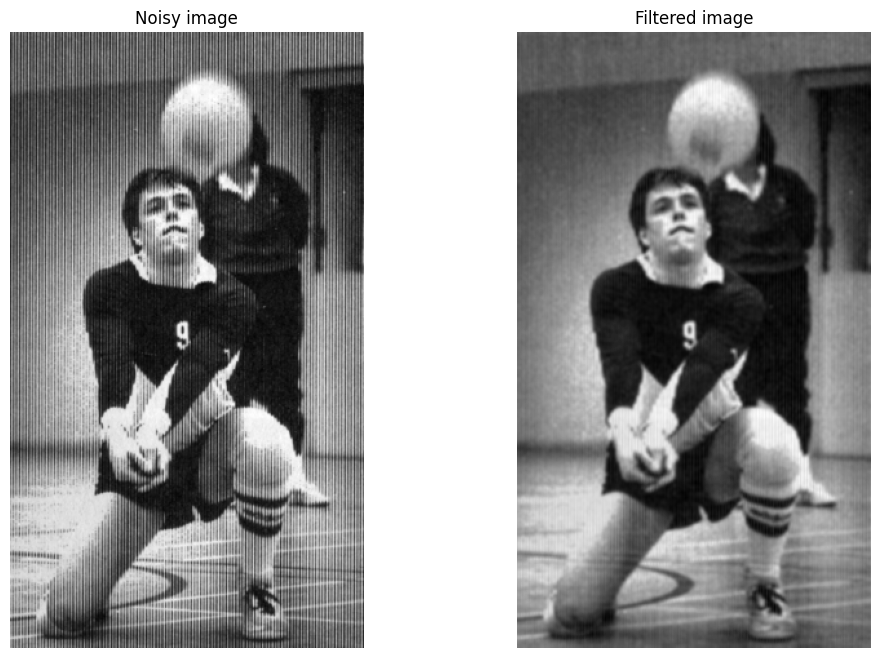

In [78]:
f, ax = plt.subplots(1,2,figsize=(12,8))

ax[0].imshow(img,cmap='gray')
ax[0].set_title("Noisy image")
ax[0].axis('off')
ax[1].imshow(blurred_img,cmap='gray')
ax[1].set_title("Filtered image")
ax[1].axis('off')

plt.show()